In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/drive/MyDrive/final_supermarket.csv")


In [4]:
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Aggregate data by month and sum the sales and quantity for each month
monthly_data = df.resample('M', on='Order Date').agg({
    'Sales': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Optionally, you can also aggregate data by product category or sub-category
# For example, to aggregate by category:
# monthly_category_data = df.groupby([pd.Grouper(key='Order Date', freq='M'), 'Category']).agg({
#     'Sales': 'sum',
#     'Quantity': 'sum'
# }).reset_index()

# Optionally, you can add additional features from the datetime column
monthly_data['Year'] = monthly_data['Order Date'].dt.year
monthly_data['Month'] = monthly_data['Order Date'].dt.month

# Display the preprocessed data
print(monthly_data.head())

  Order Date      Sales  Quantity  Year  Month
0 2014-01-31  28953.706       508  2014      1
1 2014-02-28  12743.108       319  2014      2
2 2014-03-31  54801.906       611  2014      3
3 2014-04-30  24710.016       470  2014      4
4 2014-05-31  29639.834       551  2014      5


<ipython-input-4-ec8bb9344a29>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [5]:
# Calculate additional features from the datetime column
monthly_data['Year'] = monthly_data['Order Date'].dt.year
monthly_data['Month'] = monthly_data['Order Date'].dt.month
monthly_data['Quarter'] = monthly_data['Order Date'].dt.quarter
monthly_data['DayOfMonth'] = monthly_data['Order Date'].dt.day
monthly_data['DayOfWeek'] = monthly_data['Order Date'].dt.dayofweek

# Optionally, you can calculate lag features to capture past sales information
monthly_data['PreviousMonthSales'] = monthly_data['Sales'].shift(1)
monthly_data['PreviousMonthQuantity'] = monthly_data['Quantity'].shift(1)

# Display the feature-engineered data
print(monthly_data.head())


  Order Date      Sales  Quantity  Year  Month  Quarter  DayOfMonth  \
0 2014-01-31  28953.706       508  2014      1        1          31   
1 2014-02-28  12743.108       319  2014      2        1          28   
2 2014-03-31  54801.906       611  2014      3        1          31   
3 2014-04-30  24710.016       470  2014      4        2          30   
4 2014-05-31  29639.834       551  2014      5        2          31   

   DayOfWeek  PreviousMonthSales  PreviousMonthQuantity  
0          4                 NaN                    NaN  
1          4           28953.706                  508.0  
2          0           12743.108                  319.0  
3          2           54801.906                  611.0  
4          5           24710.016                  470.0  


            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit        Month  
count  9994.000000  9994.000000  
mean     28.656896     7.809686  
std     234.260108     3.284654  
min   -6599.978000     1.000000  
25%       1.728750     5.000000  
50%       8.666500     9.000000  
75%      29.364000    11.000000  
max    8399.976000    12.000000  


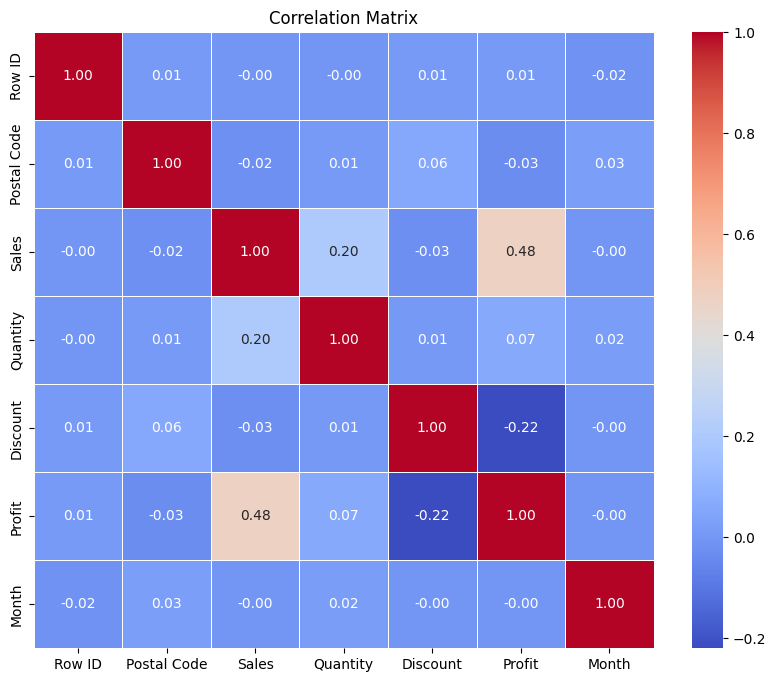

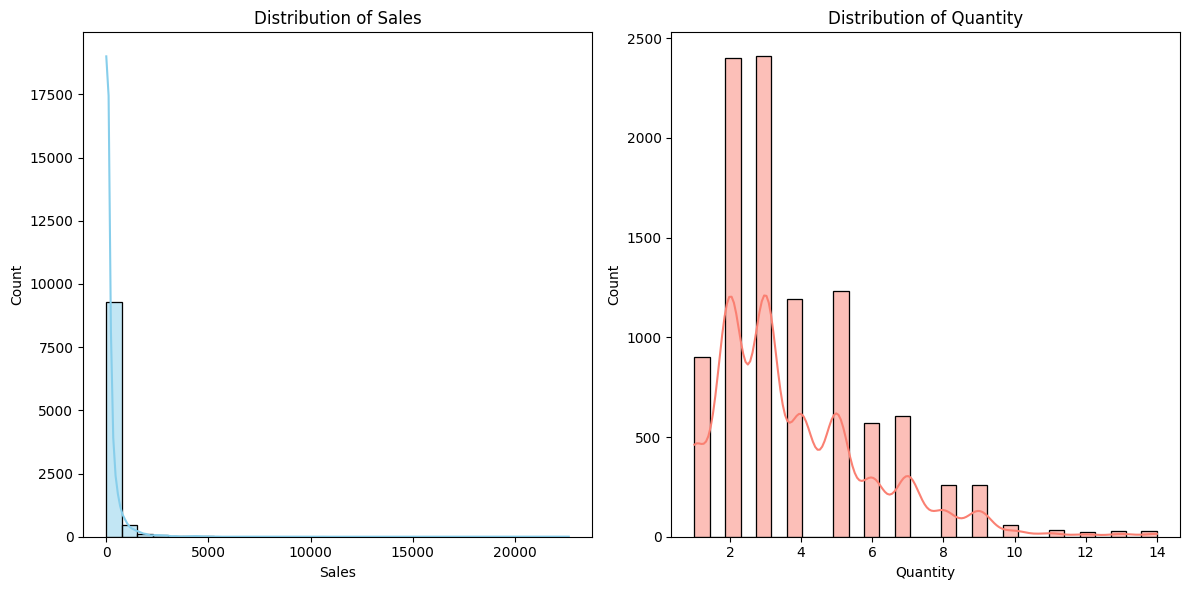

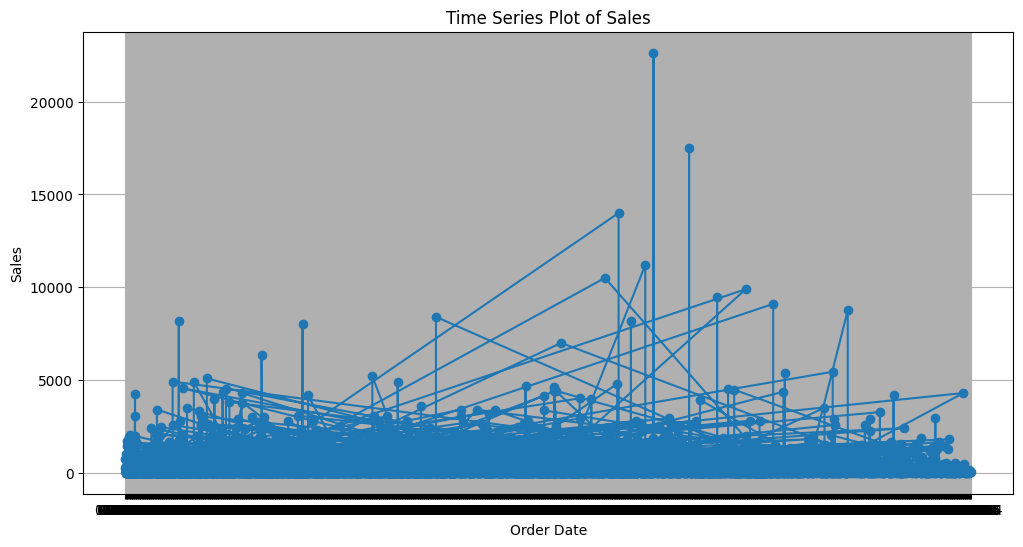

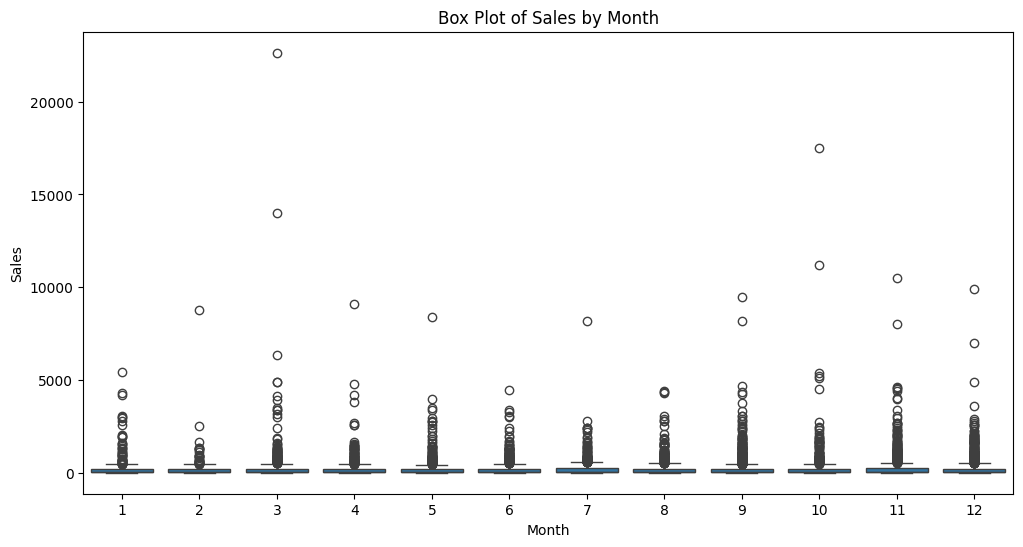

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(monthly_data.describe())

# Correlation matrix
# Exclude non-numeric columns before calculating the correlation matrix
numeric_columns = monthly_data.select_dtypes(include=['float64', 'int64']).columns
corr = monthly_data[numeric_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Distribution of sales and quantity
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(monthly_data['Sales'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')

plt.subplot(1, 2, 2)
sns.histplot(monthly_data['Quantity'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')

plt.tight_layout()
plt.show()

# Time series plot of sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Order Date'], monthly_data['Sales'], marker='o', linestyle='-')
plt.title('Time Series Plot of Sales')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# Box plot of sales by month
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Sales', data=monthly_data)
plt.title('Box Plot of Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()


<Figure size 1200x800 with 0 Axes>

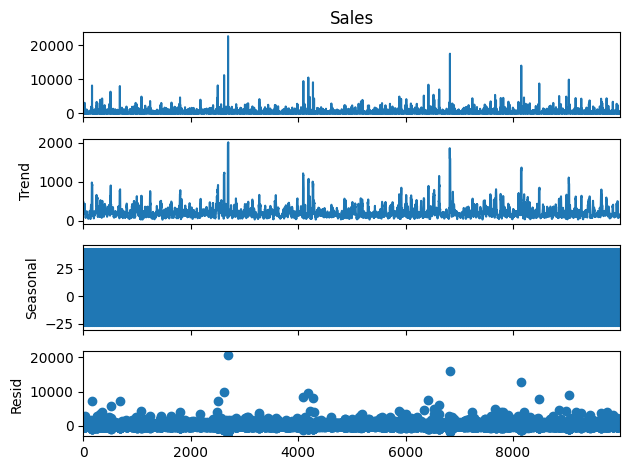

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(monthly_data['Sales'], model='additive', period=12)

# Plot the decomposition
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()


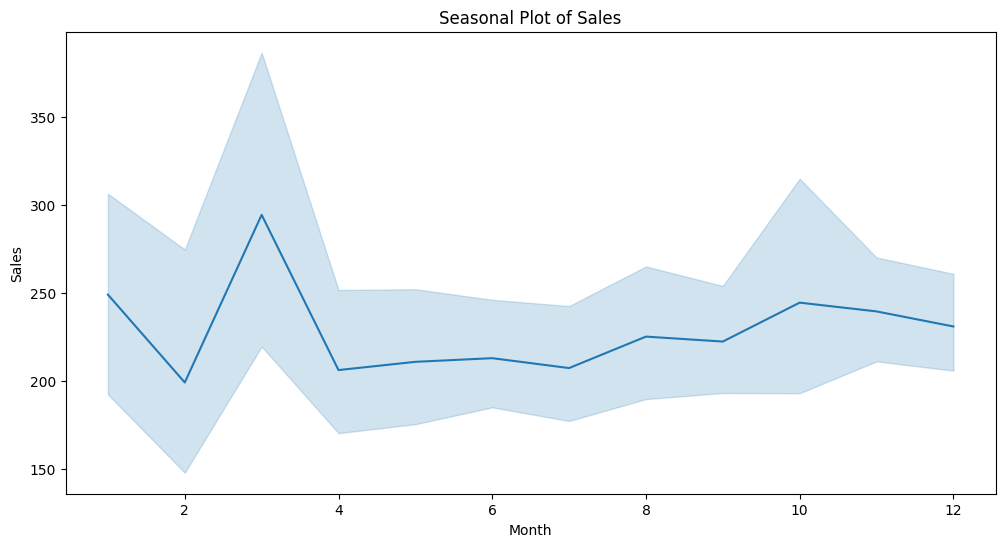

In [15]:
#seasonal analysis
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sales', data=monthly_data)
plt.title('Seasonal Plot of Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()


In [16]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = monthly_data[['Month', 'Sales']]
y = monthly_data['Sales']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (7995, 2) (7995,)
Testing set shape: (1999, 2) (1999,)


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 4.701837437218627
Mean Squared Error (MSE): 29166.283535220464
Root Mean Squared Error (RMSE): 170.78139106829076


In [24]:
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Define the number of future time periods to forecast
forecast_periods = 12
# Generate future dates for forecasting
future_dates = pd.date_range(start=df['Date'].max() + pd.Timedelta(days=1), periods=forecast_periods, freq='D')

# Prepare the future features for forecasting (if applicable)
# This involves creating new feature vectors based on future dates and any other relevant information

# Forecast future demand
future_demand = rf_model.predict(future_features)  # Replace future_features with your future feature vectors

# Create a DataFrame to store the forecast results
forecast_df = pd.DataFrame({'Date': future_dates, 'Demand Forecast': future_demand})

# Visualize the forecasted demand
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Demand'], label='Actual Demand', color='blue')
plt.plot(forecast_df['Date'], forecast_df['Demand Forecast'], label='Forecasted Demand', color='red', linestyle='--')
plt.title('Demand Forecasting')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()


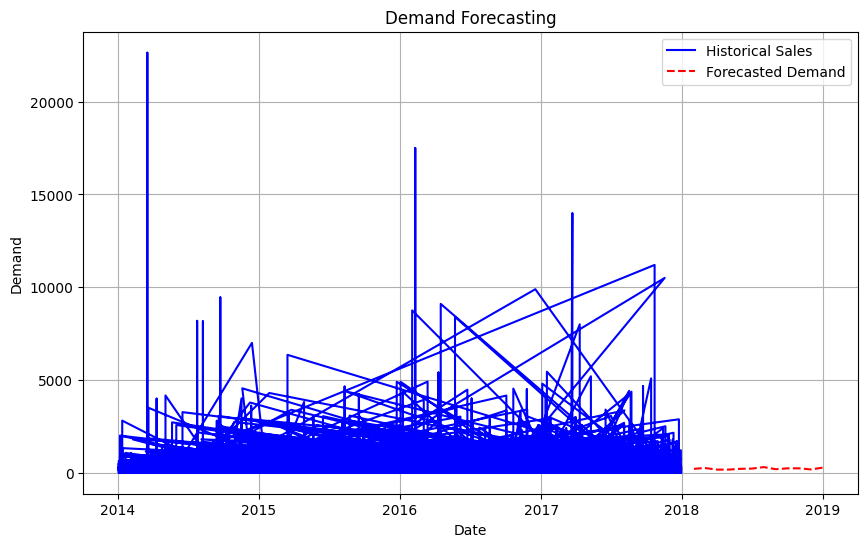

In [27]:

# Convert 'Order Date' column to datetime format
monthly_data['Order Date'] = pd.to_datetime(monthly_data['Order Date'])

# Extract 'Year' and 'Month' from 'Order Date'
monthly_data['Year'] = monthly_data['Order Date'].dt.year
monthly_data['Month'] = monthly_data['Order Date'].dt.month

# Train the Random Forest regressor model on the entire dataset
X = monthly_data[['Year', 'Month']]  # Features
y = monthly_data['Sales']  # Target variable
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Define the number of future time periods to forecast
forecast_periods = 12  # Adjust as needed

# Generate future dates for forecasting
future_dates = pd.date_range(start=monthly_data['Order Date'].max() + pd.DateOffset(months=1), periods=forecast_periods, freq='MS')

# Extract 'Year' and 'Month' from future dates
future_year = future_dates.year
future_month = future_dates.month

# Create future features DataFrame
future_features = pd.DataFrame({'Year': future_year, 'Month': future_month})

# Forecast future demand
future_demand = rf_model.predict(future_features)

# Create a DataFrame to store the forecast results
forecast_df = pd.DataFrame({'Date': future_dates, 'Demand Forecast': future_demand})

# Visualize the forecasted demand
plt.figure(figsize=(10, 6))
plt.plot(monthly_data['Order Date'], monthly_data['Sales'], label='Historical Sales', color='blue')
plt.plot(forecast_df['Date'], forecast_df['Demand Forecast'], label='Forecasted Demand', color='red', linestyle='--')
plt.title('Demand Forecasting')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
model.save("/content/drive/My Drive/demand-forecast.h5")


**SARIMA**

In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings for cleaner output

# Define and fit the SARIMA model
sarima_model = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Make predictions
sarima_pred = sarima_result.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, dynamic=False)

# Evaluate the model
mae_sarima = mean_absolute_error(y_test, sarima_pred)
mse_sarima = mean_squared_error(y_test, sarima_pred)
rmse_sarima = mean_squared_error(y_test, sarima_pred, squared=False)

print("Mean Absolute Error (MAE) for SARIMA:", mae_sarima)
print("Mean Squared Error (MSE) for SARIMA:", mse_sarima)
print("Root Mean Squared Error (RMSE) for SARIMA:", rmse_sarima)


Mean Absolute Error (MAE) for SARIMA: 272.8415900671632
Mean Squared Error (MSE) for SARIMA: 593719.410189258
Root Mean Squared Error (RMSE) for SARIMA: 770.5319008251755


**ARIMA**

In [32]:
from statsmodels.tsa.arima.model import ARIMA

# Define and fit the ARIMA model
arima_model = ARIMA(y_train, order=(5, 1, 0))
arima_result = arima_model.fit()

# Make predictions
arima_pred = arima_result.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, typ='levels')

# Evaluate the model
mae_arima = mean_absolute_error(y_test, arima_pred)
mse_arima = mean_squared_error(y_test, arima_pred)
rmse_arima = mean_squared_error(y_test, arima_pred, squared=False)

print("Mean Absolute Error (MAE) for ARIMA:", mae_arima)
print("Mean Squared Error (MSE) for ARIMA:", mse_arima)
print("Root Mean Squared Error (RMSE) for ARIMA:", rmse_arima)


Mean Absolute Error (MAE) for ARIMA: 231.29950970745634
Mean Squared Error (MSE) for ARIMA: 615006.8921403178
Root Mean Squared Error (RMSE) for ARIMA: 784.2237513237646


**XGBOOST**

In [33]:
import xgboost as xgb

# Define and train the XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)

print("Mean Absolute Error (MAE) for XGBoost:", mae_xgb)
print("Mean Squared Error (MSE) for XGBoost:", mse_xgb)
print("Root Mean Squared Error (RMSE) for XGBoost:", rmse_xgb)


Mean Absolute Error (MAE) for XGBoost: 28.865496782896148
Mean Squared Error (MSE) for XGBoost: 102341.3481671531
Root Mean Squared Error (RMSE) for XGBoost: 319.9083433847156
